In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import re

In [ ]:
df=pd.read_csv('Twitter_Data.csv', encoding='latin1')

In [ ]:
df=df.dropna()

In [ ]:
df

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_neg=df[df['category']==-1]
df_nu=df[df['category']==0]
df_pos=df[df['category']==1]

In [ ]:
df_pos['category'].value_counts()

category
1.0    72249
Name: count, dtype: int64

In [ ]:
df_nu['category'].value_counts()

category
0.0    55211
Name: count, dtype: int64

In [ ]:
df_pos=df_pos.sample(35000)
df_nu=df_nu.sample(35000)

In [ ]:
df2=pd.concat([df_pos,df_neg,df_nu],axis=0)
df2['category'].value_counts()

category
-1.0    35509
 1.0    35000
 0.0    35000
Name: count, dtype: int64

In [ ]:
df

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df2['category'].unique()

array([ 1., -1.,  0.])

In [ ]:
df2['category'].value_counts()

category
-1.0    35509
 1.0    35000
 0.0    35000
Name: count, dtype: int64

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
df2

,clean_text,category
106773,sorry chimayee cherry picking again have these...,1.0
91549,with modi and rahul gandhi also jumping into t...,1.0
57760,massive disclosure upaera isro chief saraswat ...,1.0
115933,well this seems true know few those stars,1.0
74735,and congratulation the sciemtists who are top ...,1.0
...,...,...
44341,you should kicked out the nation,0.0
94492,since chor modi sending income tax officers fo...,0.0
102266,nomination time over point sparring over choic...,0.0
112332,modi has just couple requests can give him cha...,0.0


In [ ]:
def remove_html_tags(text):
  if isinstance(text, str):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

In [ ]:
def remove_emoji(text):
  text = text.encode('ascii', 'ignore').decode('ascii')

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))


In [ ]:
chat_words={
    'ive':'i have',
    'couldnt':'could not',
    'id':'i had',
    'im':'i am',
    'dont':'do not',
    'its':'it is',
    'ur':'your',
    'asap':'as soon as possible',
    'isnt':'is not',
    'thx':'thanks',
    'ig':'i guess',
    'nyc':'New York',
    'm':'am',
    'omg':'oh my god',
    'u':'you'
}

In [ ]:
chat_words

{'ive': 'i have',
 'couldnt': 'could not',
 'id': 'i had',
 'im': 'i am',
 'dont': 'do not',
 'its': 'it is',
 'ur': 'your',
 'asap': 'as soon as possible',
 'isnt': 'is not',
 'thx': 'thanks',
 'ig': 'i guess',
 'nyc': 'New York',
 'm': 'am',
 'omg': 'oh\xa0my\xa0god',
 'u': 'you'}

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.lower() in chat_words:
            new_text.append(chat_words[w.lower()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    lemmatized_text = " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()])
    return lemmatized_text

In [ ]:
df2

,clean_text,category
106773,sorry chimayee cherry picking again have these...,1.0
91549,with modi and rahul gandhi also jumping into t...,1.0
57760,massive disclosure upaera isro chief saraswat ...,1.0
115933,well this seems true know few those stars,1.0
74735,and congratulation the sciemtists who are top ...,1.0
...,...,...
44341,you should kicked out the nation,0.0
94492,since chor modi sending income tax officers fo...,0.0
102266,nomination time over point sparring over choic...,0.0
112332,modi has just couple requests can give him cha...,0.0


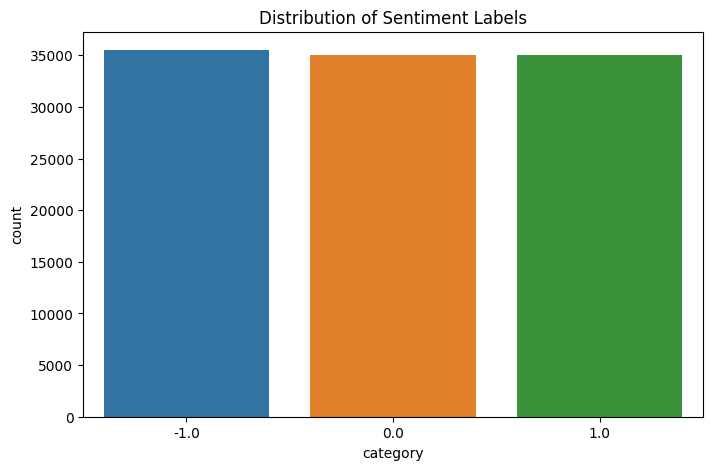

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df2)
plt.title('Distribution of Sentiment Labels')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df2['category'] = lab.fit_transform(df2['category'])
df2['category']

106773    2
91549     2
57760     2
115933    2
74735     2
         ..
44341     1
94492     1
102266    1
112332    1
111117    1
Name: category, Length: 105509, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105509 entries, 106773 to 111117
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  105509 non-null  object
 1   category    105509 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout,Embedding
from keras.preprocessing import sequence
from keras.models import load_model
import re
from nltk.tokenize import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 40000
batch_size = 32

"tokenizer = Tokenizer(num_words=max_features)\n\ntokenizer.fit_on_texts(df2['clean_text'])\nsequences = tokenizer.texts_to_sequences(df2['clean_text'])"

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class TextTokenizer(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=40000, max_length=100):
        self.max_features = max_features
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=max_features)

    def fit(self, X, y=None):
        self.tokenizer.fit_on_texts(X)
        return self

    def transform(self, X, y=None):
        sequences = self.tokenizer.texts_to_sequences(X)
        padded_sequences = pad_sequences(sequences, maxlen=self.max_length, padding='post')
        return padded_sequences

In [ ]:
text_cleaning_pipeline = Pipeline([
    ('lowercase', FunctionTransformer(lambda x: x.apply(lambda x: x.lower()))),
    ('remove_url', FunctionTransformer(lambda x: x.apply(remove_url))),
    ('remove_html_tags', FunctionTransformer(lambda x: x.apply(remove_html_tags))),
    ('remove_emoji', FunctionTransformer(lambda x: x.apply(remove_emoji))),
    ('chat_conversion', FunctionTransformer(lambda x: x.apply(chat_conversion))),
    ('remove_punc', FunctionTransformer(lambda x: x.apply(remove_punc1))),
    ('lemmatize_text', FunctionTransformer(lambda x: x.apply(lemmatize_text))),
    ('tokenize_and_pad', TextTokenizer(max_features=40000, max_length=100))
])

In [ ]:
padded_sequences = text_cleaning_pipeline.fit_transform(df2['clean_text'])

In [ ]:
labels = np.array(df2['category'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
y_train_one_hot

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, BatchNormalization, Dense, Dropout,Bidirectional,GRU
from keras.optimizers import Adam

In [ ]:
tokenizer = text_cleaning_pipeline.named_steps['tokenize_and_pad'].tokenizer
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
max_length = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │      10,070,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100, 64)             │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,186,499 (38.86 MB)

 Trainable params: 10,186,115 (38.86 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.fit(X_train, y_train_one_hot, validation_split=0.1, epochs=5, batch_size=64)

Epoch 1/5
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 269s 222ms/step - accuracy: 0.7131 - loss: 0.6535 - val_accuracy: 0.8255 - val_loss: 0.5132
Epoch 2/5
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 243s 205ms/step - accuracy: 0.9348 - loss: 0.1916 - val_accuracy: 0.6389 - val_loss: 0.9904
Epoch 3/5
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 211s 178ms/step - accuracy: 0.9580 - loss: 0.1223 - val_accuracy: 0.9095 - val_loss: 0.2872
Epoch 4/5
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 224s 189ms/step - accuracy: 0.9731 - loss: 0.0764 - val_accuracy: 0.8963 - val_loss: 0.3576
Epoch 5/5
1187/1187 ━━━━━━━━━━━━━━━━━━━━ 227s 192ms/step - accuracy: 0.9828 - loss: 0.0525 - val_accuracy: 0.9089 - val_loss: 0.3619


In [ ]:
accr1 = model.evaluate(X_test, y_test_one_hot)
accr1

660/660 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9070 - loss: 0.3735


[0.3658411204814911, 0.9086816310882568]

In [ ]:
y_pred = model.predict(X_test)

660/660 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step


In [ ]:
y_pred

array([[7.78963513e-05, 1.85117402e-04, 9.99736965e-01],
       [6.63188100e-03, 9.92345750e-01, 1.02241908e-03],
       [2.45294746e-06, 3.72968898e-05, 9.99960184e-01],
       ...,
       [5.63909474e-04, 9.99278128e-01, 1.57968665e-04],
       [8.86277735e-01, 1.13495916e-01, 2.26430318e-04],
       [9.99996781e-01, 2.60162756e-06, 6.54315158e-07]], dtype=float32)

In [ ]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label

[2,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7232
           1       0.94      0.90      0.92      6889
           2       0.92      0.88      0.90      6981

    accuracy                           0.91     21102
   macro avg       0.91      0.91      0.91     21102
weighted avg       0.91      0.91      0.91     21102



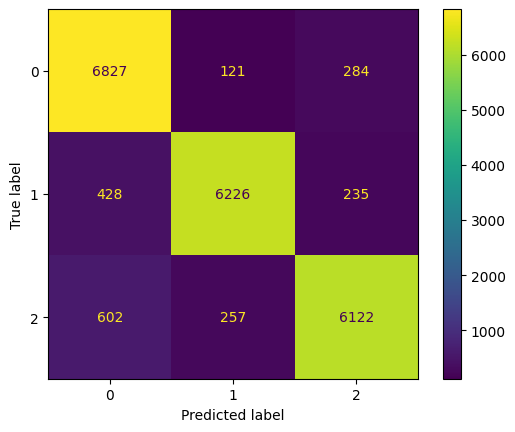

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_label);

In [ ]:
def predict_sentiment(input_text, tokenizer, model, max_length):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    prediction = model.predict(padded_input_sequence)
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    predicted_label_index = np.argmax(prediction)
    predicted_sentiment = sentiment_labels[predicted_label_index]

    return predicted_sentiment

In [ ]:
positive_rows = df2[df2['category'] == 2]
print(positive_rows[['clean_text']].head(5))

                                               clean_text
106773  sorry chimayee cherry picking again have these...
91549   with modi and rahul gandhi also jumping into t...
57760   massive disclosure upaera isro chief saraswat ...
115933        well this seems true know few those stars  
74735   and congratulation the sciemtists who are top ...


In [ ]:
input_text = "The bakery's pastries were tasty, but the prices were steep. The service was slow, and the seating area felt cramped, detracting from the overall enjoyment of the visit."
predicted_sentiment = predict_sentiment(input_text, tokenizer, model, max_length)
print("Predicted Sentiment:", predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Sentiment: Negative


In [ ]:
input_text = "good"
predicted_sentiment = predict_sentiment(input_text, tokenizer, model, max_length)
print("Predicted Sentiment:", predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Sentiment: Positive
